# House Prices Advanced Regression (Kaggle)

### importing packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from scipy.stats import norm
from scipy import stats
from ml_metrics import rmse
import seaborn as sns
%matplotlib inline

### reading csv files

In [2]:
training_data = pd.read_csv('train.csv')
testing_data = pd.read_csv('test.csv')

## Exploratory Data Analysis

In [3]:
training_data.describe(include='all')
testing_data.describe(include='all')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
count,1459.000000,1459.000000,1455,1232.000000,1459.000000,1459,107,1459,1459,1457,...,1459.000000,1459.000000,3,290,51,1459.000000,1459.000000,1459.000000,1458,1459
unique,NaN,NaN,5,NaN,NaN,2,2,4,4,1,...,NaN,NaN,2,4,3,NaN,NaN,NaN,9,6
top,NaN,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,AllPub,...,NaN,NaN,Ex,MnPrv,Shed,NaN,NaN,NaN,WD,Normal
freq,NaN,NaN,1114,NaN,NaN,1453,70,934,1311,1457,...,NaN,NaN,2,172,46,NaN,NaN,NaN,1258,1204
mean,2190.000000,57.378341,NaN,68.580357,9819.161069,NaN,NaN,NaN,NaN,NaN,...,17.064428,1.744345,NaN,NaN,NaN,58.167923,6.104181,2007.769705,NaN,NaN
std,421.321334,42.746880,NaN,22.376841,4955.517327,NaN,NaN,NaN,NaN,NaN,...,56.609763,30.491646,NaN,NaN,NaN,630.806978,2.722432,1.301740,NaN,NaN
min,1461.000000,20.000000,NaN,21.000000,1470.000000,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,NaN,NaN,NaN,0.000000,1.000000,2006.000000,NaN,NaN
25%,1825.500000,20.000000,NaN,58.000000,7391.000000,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,NaN,NaN,NaN,0.000000,4.000000,2007.000000,NaN,NaN
50%,2190.000000,50.000000,NaN,67.000000,9399.000000,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,NaN,NaN,NaN,0.000000,6.000000,2008.000000,NaN,NaN
75%,2554.500000,70.000000,NaN,80.000000,11517.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,NaN,NaN,NaN,0.000000,8.000000,2009.000000,NaN,NaN


In [4]:
#id is not really important for regression
training_data.drop('Id',axis=1,inplace=True)
testing_data.drop('Id',axis=1,inplace=True)

In [5]:
training_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

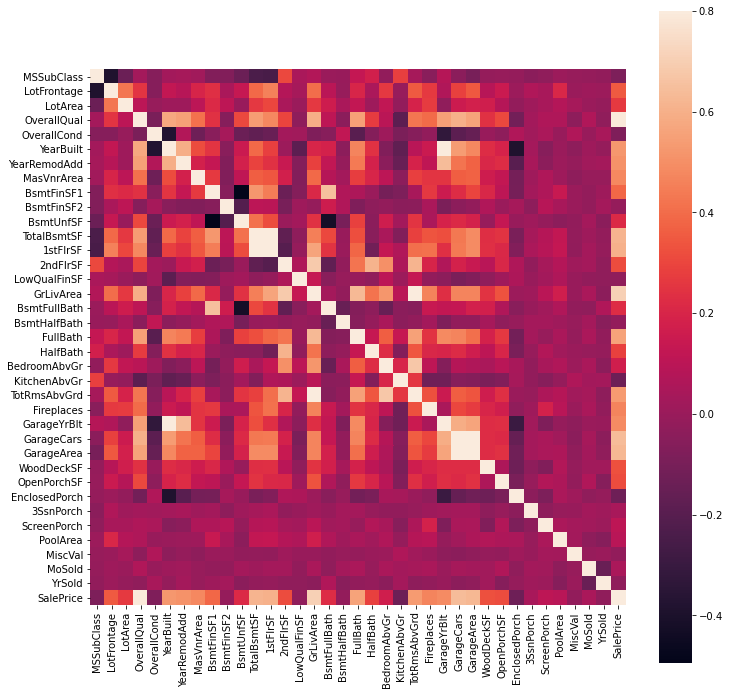

In [7]:
corr_matrix = training_data.corr()
plt.subplots(figsize=(12, 12))
sns.heatmap(corr_matrix,vmax=0.8,square=True)

#### following variables can play an important role in this problem:
    1. OverallQual
    2. GrLivArea
    3. GarageCars / GarageArea
    4. FullBath
    5. TotalBsmtSF
    6. YearBuilt

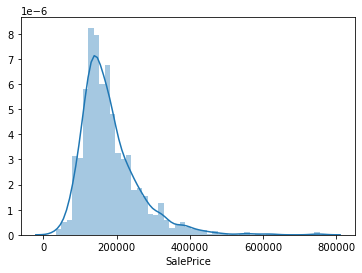

In [8]:
#histogram
sns.distplot(training_data['SalePrice']);

#### observations:
    1. Deviate from the normal distribution.
    2. Have appreciable positive skewness.
    3. Show peakedness.

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Text(0.5, 1.0, 'Relation between GrLivArea and SalePrice')

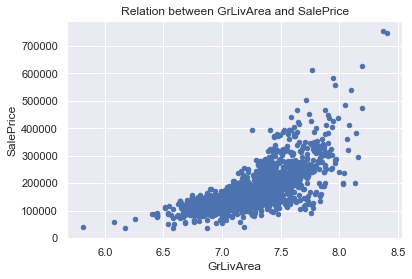

In [79]:
training_data.plot(kind='scatter',x='GrLivArea',y='SalePrice')
plt.title("Relation between GrLivArea and SalePrice")

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Text(0.5, 1.0, 'Relation between TotalBsmtSF and SalePrice')

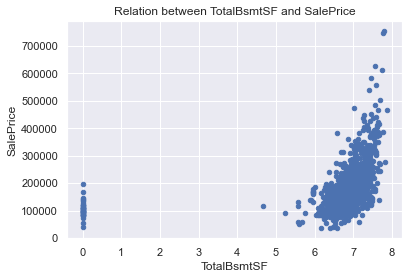

In [80]:
training_data.plot(kind='scatter',x='TotalBsmtSF',y='SalePrice')
plt.title("Relation between TotalBsmtSF and SalePrice")

Text(0.5, 1.0, 'Relation between OverallQual and SalePrice')

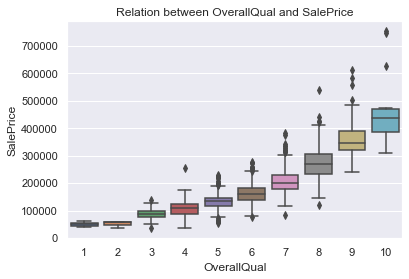

In [81]:
sns.boxplot(x='OverallQual', y="SalePrice", data=training_data)
plt.title("Relation between OverallQual and SalePrice")

Text(0.5, 1.0, 'Relation between YearBuilt and SalePrice')

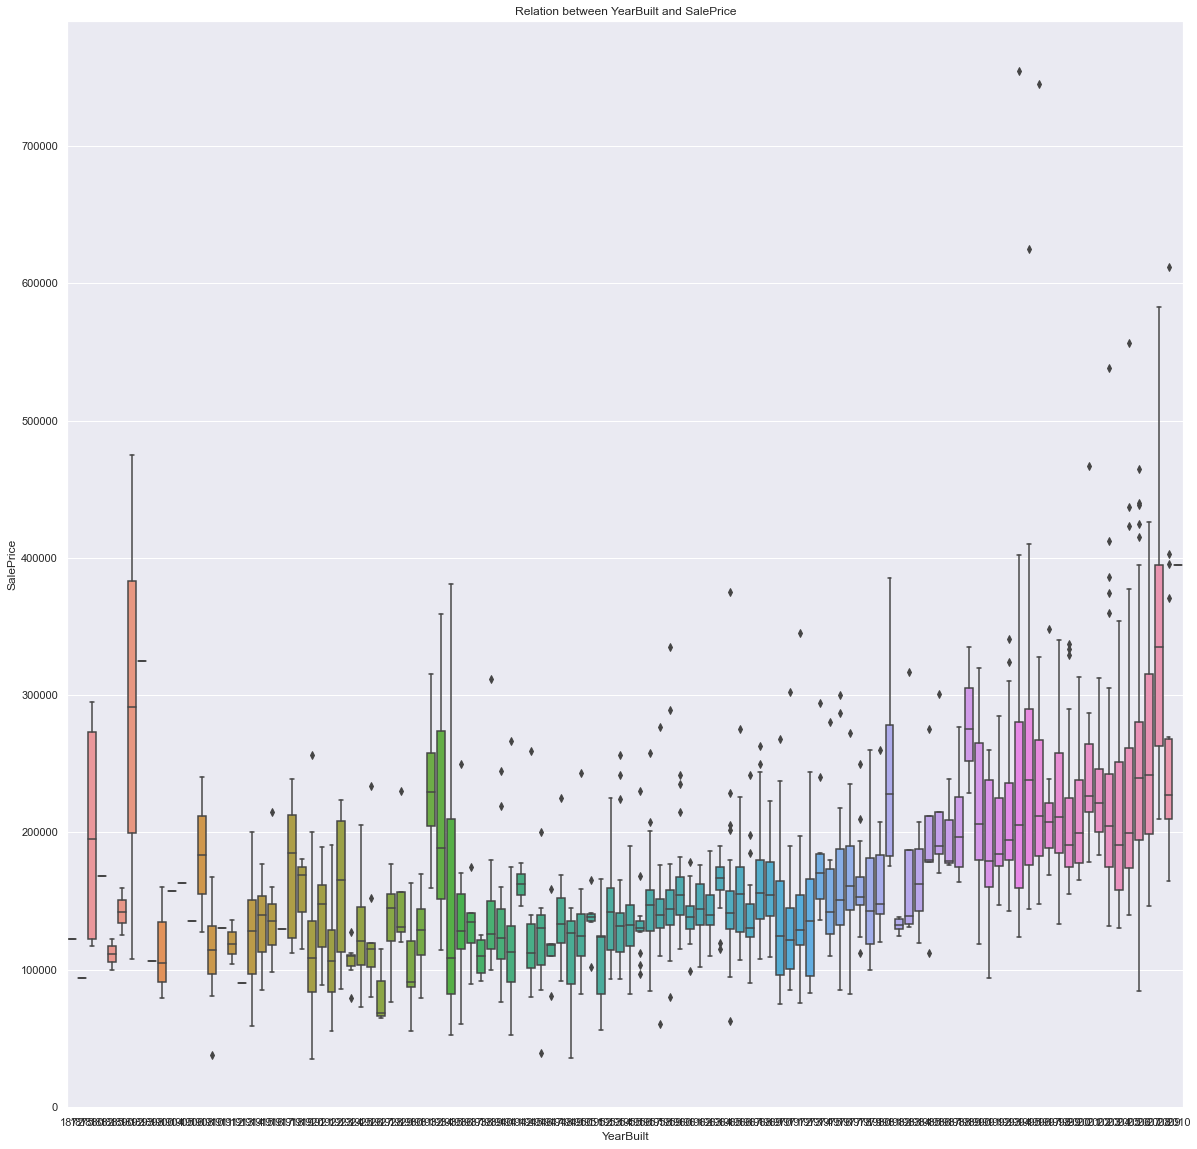

In [82]:
plt.subplots(figsize=(20,20))
sns.boxplot(x='YearBuilt', y="SalePrice", data=training_data)
plt.title("Relation between YearBuilt and SalePrice")

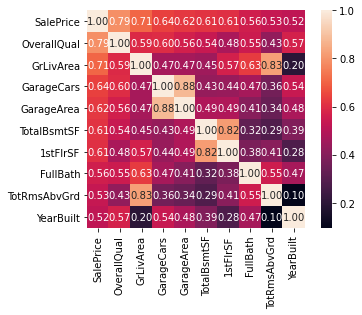

In [13]:
cols = corr_matrix.nlargest(10, 'SalePrice')['SalePrice'].index
Matrix = np.corrcoef(training_data[cols].values.T)
sns.heatmap(Matrix, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)

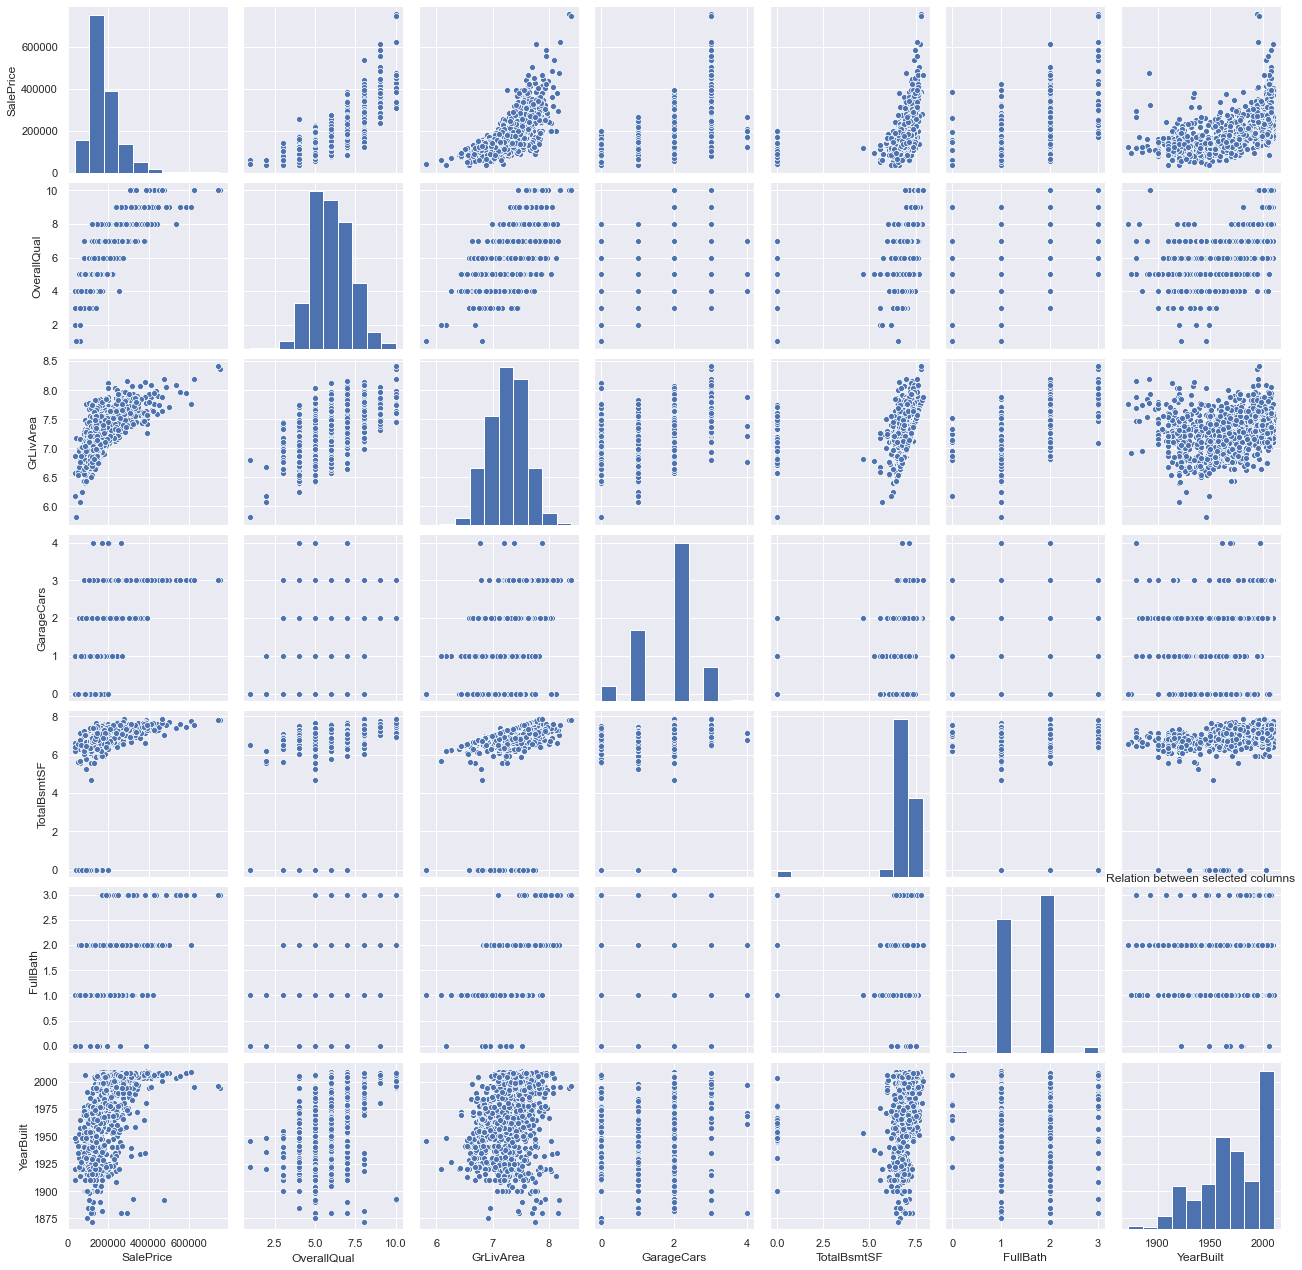

In [83]:
#scatterplot
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(training_data[cols], height = 2.5)
plt.title("Relation between selected columns")
plt.show();

## Missing data

In [16]:
training_data.fillna(0,inplace=True)

#### Univariate Analysis

In [19]:
#standardizing data
from sklearn.preprocessing import StandardScaler
saleprice_scaled = StandardScaler().fit_transform(training_data['SalePrice'][:,np.newaxis]);
low_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][:10]
high_range= saleprice_scaled[saleprice_scaled[:,0].argsort()][-10:]
print('outer range (low) of the distribution:')
print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)

outer range (low) of the distribution:
[[-1.83870376]
 [-1.83352844]
 [-1.80092766]
 [-1.78329881]
 [-1.77448439]
 [-1.62337999]
 [-1.61708398]
 [-1.58560389]
 [-1.58560389]
 [-1.5731    ]]

outer range (high) of the distribution:
[[3.82897043]
 [4.04098249]
 [4.49634819]
 [4.71041276]
 [4.73032076]
 [5.06214602]
 [5.42383959]
 [5.59185509]
 [7.10289909]
 [7.22881942]]


### Bivariate Analysis

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


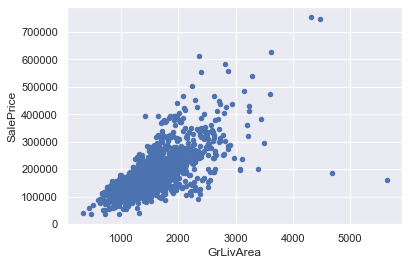

In [20]:
#bivariate analysis saleprice/grlivarea
training_data.plot(kind='scatter',x='GrLivArea', y='SalePrice')

In [21]:
#deleting outliers
training_data.sort_values(by = 'GrLivArea', ascending = False)[:2]
training_data = training_data.drop(training_data[training_data['GrLivArea'] > 4600 ].index)


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


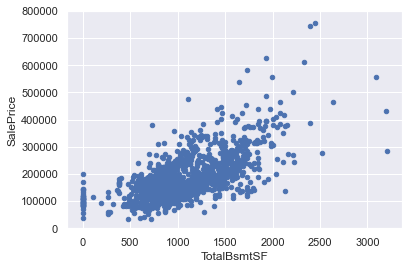

In [22]:
#bivariate analysis saleprice/grlivarea
var = 'TotalBsmtSF'
training_data.plot(kind='scatter',x=var, y='SalePrice', ylim=(0,800000))

In [23]:
#deleting outliers
training_data = training_data.drop(training_data[training_data['TotalBsmtSF'] > 3000 ].index)

### Normality
Normal probability plot - Data distribution should closely follow the diagonal that represents the normal distribution.

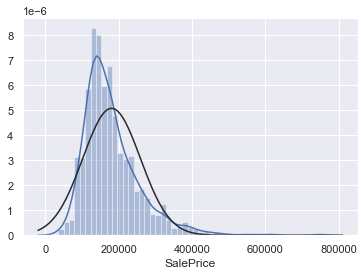

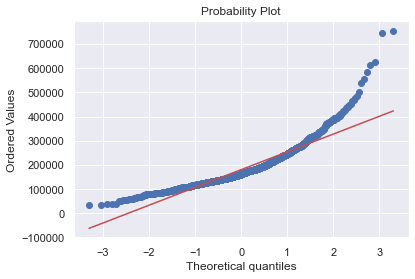

In [24]:
#histogram and normal probability plot
sns.distplot(training_data['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(training_data['SalePrice'], plot=plt)

In [25]:
#data transformation
training_data['GrLivArea'] = np.log(training_data['GrLivArea'])
testing_data['GrLivArea'] = np.log(testing_data['GrLivArea'])

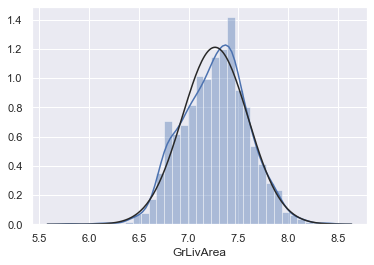

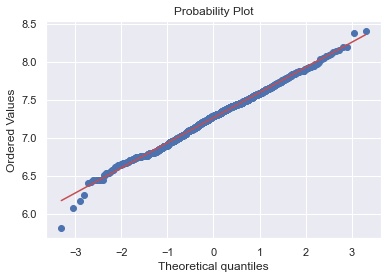

In [26]:
#transformed histogram and normal probability plot
sns.distplot(training_data['GrLivArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(training_data['GrLivArea'], plot=plt)

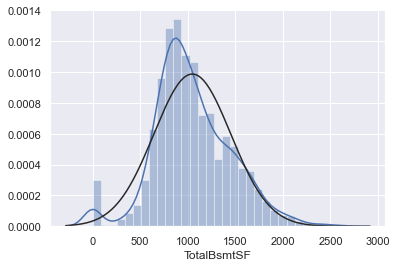

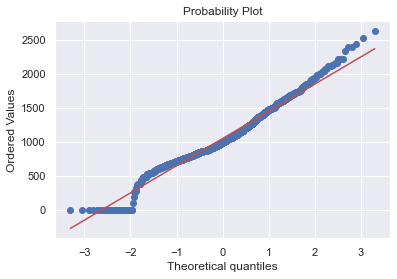

In [27]:
#histogram and normal probability plot
sns.distplot(training_data['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(training_data['TotalBsmtSF'], plot=plt)

In [28]:
#create column for new variable (one is enough because it's a binary categorical feature)
#if area>0 it gets 1, for area==0 it gets 0
training_data['HasBsmt'] = pd.Series(len(training_data['TotalBsmtSF']), index=training_data.index)
training_data['HasBsmt'] = 0 
training_data.loc[training_data['TotalBsmtSF']>0,'HasBsmt'] = 1

In [29]:
testing_data['HasBsmt'] = pd.Series(len(testing_data['TotalBsmtSF']), index=testing_data.index)
testing_data['HasBsmt'] = 0 
testing_data.loc[testing_data['TotalBsmtSF']>0,'HasBsmt'] = 1

In [30]:
#transform data
training_data.loc[training_data['HasBsmt']==1,'TotalBsmtSF'] = np.log(training_data['TotalBsmtSF'])
testing_data.loc[testing_data['HasBsmt']==1,'TotalBsmtSF'] = np.log(testing_data['TotalBsmtSF'])

C:\Users\cshuk\AppData\Roaming\Python\Python38\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


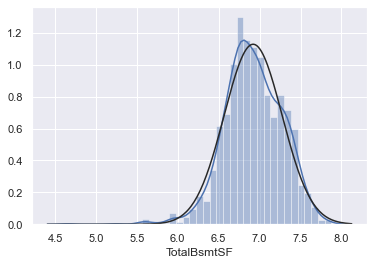

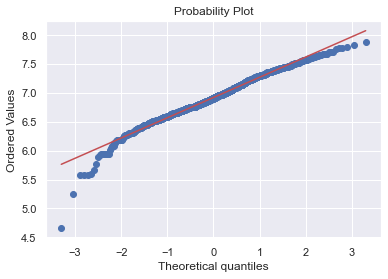

In [31]:
#histogram and normal probability plot
sns.distplot(training_data[training_data['TotalBsmtSF']>0]['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(training_data[training_data['TotalBsmtSF']>0]['TotalBsmtSF'], plot=plt)

clubbing training and testing data together for generating dummy values

In [32]:
import copy
train_objs_num = len(training_data)
dataset = pd.concat(objs=[training_data, testing_data], axis=0)
dataset = pd.get_dummies(dataset)
training_data = copy.copy(dataset[:train_objs_num])
testing_data = copy.copy(dataset[train_objs_num:])

In [33]:
training_data.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,...,0,0,0,1,0,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,...,0,0,0,1,0,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,...,0,0,0,1,0,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,...,0,0,0,1,1,0,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,...,0,0,0,1,0,0,0,0,1,0


### Different Models and their rmse scores

In [34]:
Linear_model= LinearRegression()
Y = training_data['SalePrice']
X = training_data.drop(['SalePrice'],axis=1)
X_train, X_test ,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=100)

In [35]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform (X_test)

In [36]:
Linear_model.fit(X_train,Y_train)
prediction = Linear_model.predict(X_test)

In [37]:
rmse(Y_test,prediction)

9377978475336580.0

In [38]:
from sklearn.linear_model import Ridge
clf = Ridge(alpha=1.0)
clf.fit(X_train,Y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [39]:
prediction_next=clf.predict(X_test)

In [40]:
rmse(Y_test,prediction_next)

25011.482363644576

In [41]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()

In [42]:
LR.fit(X_train,Y_train)

C:\Users\cshuk\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [43]:
yhat = LR.predict(X_test)

In [44]:
rmse(Y_test,yhat)

51079.279313826766

In [45]:
from sklearn.linear_model import Lasso

In [46]:
lasso = Lasso()
lasso.fit(X_train,Y_train)
train_score=lasso.score(X_train,Y_train)
test_score=lasso.score(X_test,Y_test)

C:\Users\cshuk\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 185783753335.84177, tolerance: 734147998.8165803
  model = cd_fast.enet_coordinate_descent(


In [47]:
train_score

0.9473473247810468

In [48]:
test_score

0.8748977325828255

In [49]:
predict_lasso=lasso.predict(X_test)

In [50]:
rmse(Y_test,predict_lasso)

26619.9949718876

In [51]:
lasso001 = Lasso(alpha=0.01, max_iter=10e5)
lasso001.fit(X_train,Y_train)

Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000000.0,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [52]:
predict_lasso001=lasso001.predict(X_test)
rmse(Y_test,predict_lasso001)

55960.91016814476

In [53]:
testing_data.fillna(0,inplace=True)

In [54]:
testing_data.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,20,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,...,0,0,0,1,0,0,0,0,1,0
1,20,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,...,0,0,0,1,0,0,0,0,1,0
2,60,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,...,0,0,0,1,0,0,0,0,1,0
3,60,78.0,9978,6,6,1998,1998,20.0,602.0,0.0,...,0,0,0,1,0,0,0,0,1,0
4,120,43.0,5005,8,5,1992,1992,0.0,263.0,0.0,...,0,0,0,1,0,0,0,0,1,0


In [55]:
testing_data.shape

(1459, 305)

In [58]:
testing_data.drop('SalePrice',axis=1,inplace=True)

In [59]:
testing_data = sc.transform(testing_data)
prediction_next=clf.predict(testing_data)

In [67]:
answer = pd.DataFrame(prediction_next)

,0
0,-209936.773529
1,-176500.075644
2,-125551.555125
3,-120639.428505
4,-118886.080257
...,...
1454,-232209.570068
1455,-241875.841390
1456,-137710.716872
1457,-190729.298285


In [69]:
answer.rename(columns={0:"SalePrice"},inplace=True)

In [70]:
answer['Id'] = answer.index + 1461
answer['SalePrice'] = answer['SalePrice'] * -1

In [71]:
answer = answer[['Id','SalePrice']]

In [72]:
answer.to_csv("Solution.csv",index=False)

In [75]:
answer_lasso=lasso.predict(testing_data)

In [76]:
answer_lasso

array([-745151.46679509, -712953.61248463, -661013.52420437, ...,
       -672500.07005349, -737692.97131551, -632179.96730249])

In [77]:
answer = pd.DataFrame(answer_lasso)
answer.rename(columns={0:"SalePrice"},inplace=True)
answer['Id'] = answer.index + 1461
answer['SalePrice'] = answer['SalePrice'] * -1
answer = answer[['Id','SalePrice']]
answer.head()

,Id,SalePrice
0,1461,745151.466795
1,1462,712953.612485
2,1463,661013.524204
3,1464,655147.757319
4,1465,654682.583322


In [78]:
answer.to_csv("Solution.csv",index=False)